In [1]:
import pandas as pd
import sklearn as sk
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Chargement et Analyse de données

In [3]:
data = pd.read_csv("titanic.csv")

In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
for a in data.columns:
    print(a, " : ", data[a].nunique())

PassengerId  :  891
Survived  :  2
Pclass  :  3
Name  :  891
Sex  :  2
Age  :  88
SibSp  :  7
Parch  :  7
Ticket  :  681
Fare  :  248
Cabin  :  147
Embarked  :  3


In [8]:
data.isnull().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 2- Pré-traitement des données

#### - Traitement des valeurs manquantes (suppression ou remplissage, selon le besoin)
#### - Suppression des variables inutiles
#### - Transformation de données (encodage)
#### - Normalisation (scaler)

In [10]:
data["Age"] = data["Age"].fillna(data['Age'].median())

In [11]:
data.isnull().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
data.drop(['Cabin','Name', 'PassengerId', 'Ticket'],axis=1,inplace=True)

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
data.isnull().sum()/data.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [15]:
data.dropna(inplace=True)

In [16]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
data["Sex"] = data["Sex"].map({'male': 0, 'female': 1})

In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,28.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [19]:
data = pd.get_dummies(data, columns=["Embarked"])

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,False,True
887,1,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,1,28.0,1,2,23.4500,False,False,True
889,1,1,0,26.0,0,0,30.0000,True,False,False


In [21]:
from sklearn.model_selection import train_test_split

# Séparation features/target
X = data.drop("Survived", axis=1)
y = data["Survived"]



In [22]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,3,0,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,3,1,28.0,1,2,23.4500,False,False,True
889,1,0,26.0,0,0,30.0000,True,False,False


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

# Normalisation (utile pour KNN & MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=data.drop("Survived", axis=1).columns)

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.825209,-0.735342,-0.563674,0.431350,-0.474326,-0.500240,-0.482711,-0.307941,0.616794
1,-1.572211,1.359911,0.669217,0.431350,-0.474326,0.788947,2.071634,-0.307941,-1.621287
2,0.825209,1.359911,-0.255451,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794
3,-1.572211,1.359911,0.438050,0.431350,-0.474326,0.422861,-0.482711,-0.307941,0.616794
4,0.825209,-0.735342,0.438050,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.178396,-0.475199,-0.474326,-0.384475,-0.482711,-0.307941,0.616794
885,-1.572211,1.359911,-0.794841,-0.475199,-0.474326,-0.042213,-0.482711,-0.307941,0.616794
886,0.825209,1.359911,-0.101340,0.431350,2.006119,-0.174084,-0.482711,-0.307941,0.616794
887,-1.572211,-0.735342,-0.255451,-0.475199,-0.474326,-0.042213,2.071634,-0.307941,-1.621287


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## 3- Découpage des données (Train / Test)

In [28]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
485,-1.572211,1.359911,0.438050,0.431350,-0.474326,1.165771,-0.482711,-0.307941,0.616794
292,0.825209,1.359911,-0.409563,-0.475199,-0.474326,-0.468027,-0.482711,-0.307941,0.616794
172,0.825209,-0.735342,-0.640730,-0.475199,-0.474326,-0.486650,-0.482711,-0.307941,0.616794
449,-0.373501,-0.735342,0.515106,0.431350,2.006119,-0.087512,-0.482711,-0.307941,0.616794
360,-0.373501,-0.735342,-0.024284,0.431350,-0.474326,-0.088100,2.071634,-0.307941,-1.621287
...,...,...,...,...,...,...,...,...,...
106,0.825209,-0.735342,-0.101340,-0.475199,-0.474326,-0.489670,-0.482711,-0.307941,0.616794
270,0.825209,-0.735342,-0.332507,-0.475199,-0.474326,-0.646204,-0.482711,-0.307941,0.616794
860,-1.572211,1.359911,1.439774,-0.475199,-0.474326,-0.124170,-0.482711,-0.307941,0.616794
435,0.825209,1.359911,-0.640730,1.337900,2.006119,0.045870,-0.482711,-0.307941,0.616794


In [30]:
y_train

486    1
293    0
173    0
450    0
361    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 622, dtype: int64

In [31]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
280,0.825209,-0.735342,-0.101340,-0.475199,-0.474326,-0.488075,-0.482711,-0.307941,0.616794
434,-1.572211,1.359911,-1.180120,0.431350,2.006119,1.769763,-0.482711,-0.307941,0.616794
39,0.825209,1.359911,-1.180120,0.431350,-0.474326,-0.419875,2.071634,-0.307941,-1.621287
417,-0.373501,-0.735342,0.052771,-0.475199,-0.474326,-0.384475,-0.482711,-0.307941,0.616794
584,-1.572211,1.359911,-0.871897,-0.475199,2.006119,0.957394,-0.482711,-0.307941,0.616794
...,...,...,...,...,...,...,...,...,...
453,0.825209,-0.735342,-0.101340,-0.475199,-0.474326,-0.484133,-0.482711,-0.307941,0.616794
631,-1.572211,-0.735342,0.206883,-0.475199,-0.474326,-0.032146,2.071634,-0.307941,-1.621287
692,0.825209,-0.735342,-0.332507,-0.475199,-0.474326,-0.500743,2.071634,-0.307941,-1.621287
740,-1.572211,-0.735342,0.515106,0.431350,-0.474326,0.941287,-0.482711,-0.307941,0.616794


## 4- Apprentissage (Modeling) et évaluation
Apprentissage de 4 modèles différents : 
- KNN,
- Arbre de décision,
- Random Forest (modèle ensembliste),
- Réseau de neurones (MLP) 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

model = knn.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(y_pred, y_test))
print(precision_score(y_pred, y_test))
print(recall_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8014981273408239
0.72
0.7422680412371134
[[142  28]
 [ 25  72]]


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Arbre de Décision
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(accuracy_score(y_pred_dt, y_test))
print(precision_score(y_pred_dt, y_test))
print(recall_score(y_pred_dt, y_test))
print(confusion_matrix(y_pred_dt, y_test))

0.7715355805243446
0.72
0.6857142857142857
[[134  28]
 [ 33  72]]


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_pred_rf, y_test))
print(precision_score(y_pred_rf, y_test))
print(recall_score(y_pred_rf, y_test))
print(confusion_matrix(y_pred_rf, y_test))

0.7715355805243446
0.65
0.7142857142857143
[[141  35]
 [ 26  65]]


In [37]:
from sklearn.neural_network import MLPClassifier

# Réseau de Neurones (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print(accuracy_score(y_pred_mlp, y_test))
print(precision_score(y_pred_mlp, y_test))
print(recall_score(y_pred_mlp, y_test))
print(confusion_matrix(y_pred_mlp, y_test))


0.797752808988764
0.66
0.7674418604651163
[[147  34]
 [ 20  66]]


In [38]:
from sklearn.metrics import classification_report

# --- Évaluation ---
print("🔹 KNN:\n", classification_report(y_test, y_pred))
print("🔹 Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("🔹 Random Forest:\n", classification_report(y_test, y_pred_rf))
print("🔹 Neural Network (MLP):\n", classification_report(y_test, y_pred_mlp))

🔹 KNN:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       167
           1       0.74      0.72      0.73       100

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

🔹 Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       167
           1       0.69      0.72      0.70       100

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267

🔹 Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.71      0.65      0.68       100

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.77      0

## 5- Explication des modèles avec Feature Importance

Utiliser 2 méthodes d'explicabilité :
- Permutation Importance (Explicabilité Globale)
- Shap (Explicabilité Locale et Globale)

### a- Permutation Importance

In [41]:
# Importation de la fonction permutation_importance de scikit-learn
# Cette fonction permet d'estimer l'importance de chaque variable (feature)
# en mesurant la dégradation des performances du modèle lorsque l'on perturbe aléatoirement une variable.

from sklearn.inspection import permutation_importance

In [42]:

# Application de la méthode permutation_importance
# - On l'applique sur le modèle 'rf' (par exemple, Random Forest déjà entraîné).
# - On utilise les données de test (X_test, y_test) : car on veut analyser en conditions réelles ce que le modèle utilise pour prédire efficacement.
# - scoring='accuracy' signifie que la métrique d'évaluation est la précision (accuracy).

results = permutation_importance(rf, X_test, y_test, scoring='accuracy')

# Récupération de la moyenne des importances de permutation pour chaque variable
# permutation_importance de scikit-learn va, pour chaque variable, faire plusieurs permutations (par défaut, n_repeats=5) 
importances = results.importances_mean

print(results)
print(importances)

{'importances_mean': array([ 0.02771536,  0.1670412 ,  0.01498127, -0.0164794 , -0.00449438,
        0.01048689, -0.00149813, -0.00299625,  0.00224719]), 'importances_std': array([0.01564091, 0.01797753, 0.01230837, 0.00694653, 0.00763898,
       0.00799781, 0.00381949, 0.00280274, 0.00560548]), 'importances': array([[ 0.00374532,  0.05243446,  0.02996255,  0.02247191,  0.02996255],
       [ 0.15355805,  0.16853933,  0.14606742,  0.19850187,  0.16853933],
       [-0.00374532,  0.02621723,  0.01498127,  0.02996255,  0.00749064],
       [-0.01498127, -0.00374532, -0.01872659, -0.02247191, -0.02247191],
       [-0.01498127, -0.00749064,  0.00749064, -0.00749064,  0.        ],
       [ 0.01498127,  0.        ,  0.02247191,  0.00374532,  0.01123596],
       [-0.00749064,  0.        , -0.00374532,  0.00374532,  0.        ],
       [-0.00374532, -0.00374532,  0.        , -0.00749064,  0.        ],
       [-0.00749064,  0.        ,  0.00374532,  0.00749064,  0.00749064]])}
[ 0.02771536  0.1670

In [43]:
# Affichage de l'importance pour chaque variable
# - On parcourt toutes les colonnes de X (features)
# - Et on affiche l'importance associée

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Pclass: 0.0277
Sex: 0.1670
Age: 0.0150
SibSp: -0.0165
Parch: -0.0045
Fare: 0.0105
Embarked_C: -0.0015
Embarked_Q: -0.0030
Embarked_S: 0.0022


C:\Users\ILEF\AppData\Local\Temp\ipykernel_1720\2775455752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


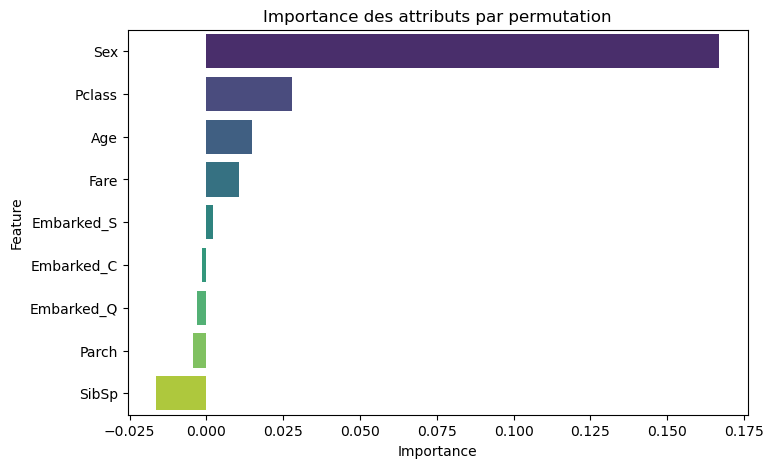

In [44]:
# Importation des bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# On regroupe les noms des variables (X.columns) et leur importance moyenne (importances) dans un DataFrame.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Tri des variables par ordre d'importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Création du graphique en barres horizontales
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des attributs par permutation')
plt.show()

#### A faire :
##### 1) Quels attributs semblent les plus importants pour le modèle ?
##### 2) Y a-t-il des attributs qui semblent inutiles ?
##### 3) Appliquez la permutation importance sur les autres modèles (KNN, DT, MLP).
##### 4) Essayez de mesurer l’importance avec une autre métrique (ex: F1-score) sur le modèle random Forest (comparer les 2 résultats).

Pclass: 0.0509
Sex: 0.1588
Age: 0.0225
SibSp: 0.0367
Parch: 0.0022
Fare: 0.0397
Embarked_C: -0.0075
Embarked_Q: 0.0142
Embarked_S: 0.0060


C:\Users\ILEF\AppData\Local\Temp\ipykernel_1720\2293271666.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


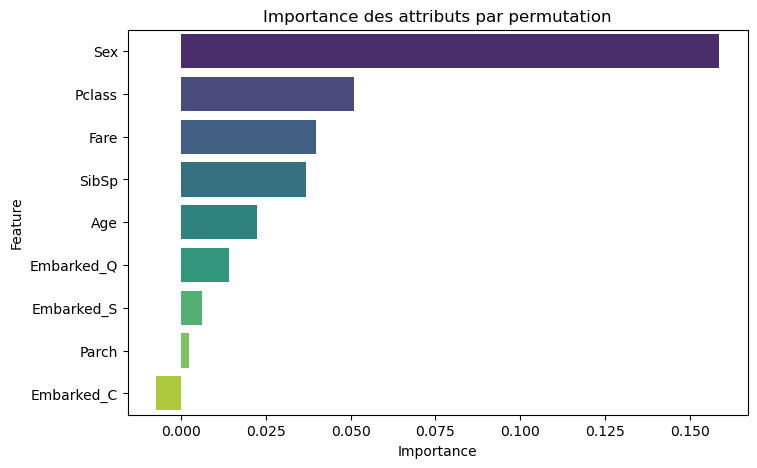

In [46]:
#### Afficher les valeurs d'importance pour le modèle knn

results = permutation_importance(knn, X_test, y_test, scoring='accuracy')

# Récupération de la moyenne des importances de permutation pour chaque variable
# permutation_importance de scikit-learn va, pour chaque variable, faire plusieurs permutations (par défaut, n_repeats=5) 
importances_knn = results.importances_mean

for feature, importance in zip(X.columns, importances_knn):
    print(f"{feature}: {importance:.4f}")

# On regroupe les noms des variables (X.columns) et leur importance moyenne (importances) dans un DataFrame.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances_knn})

# Tri des variables par ordre d'importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Création du graphique en barres horizontales
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des attributs par permutation')
plt.show()


Pclass: 0.0637
Sex: 0.1169
Age: 0.0382
SibSp: 0.0105
Parch: -0.0045
Fare: 0.0322
Embarked_C: 0.0022
Embarked_Q: 0.0000
Embarked_S: 0.0142


C:\Users\ILEF\AppData\Local\Temp\ipykernel_1720\3912287886.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


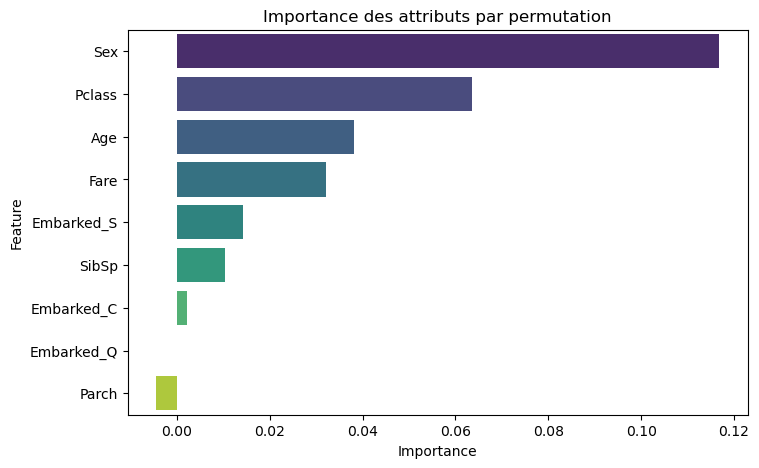

In [47]:
#### Afficher les valeurs d'importance pour le modèle DT

results = permutation_importance(dt, X_test, y_test, scoring='accuracy')

# Récupération de la moyenne des importances de permutation pour chaque variable
# permutation_importance de scikit-learn va, pour chaque variable, faire plusieurs permutations (par défaut, n_repeats=5) 
importances_dt = results.importances_mean

for feature, importance in zip(X.columns, importances_dt):
    print(f"{feature}: {importance:.4f}")

# On regroupe les noms des variables (X.columns) et leur importance moyenne (importances) dans un DataFrame.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances_dt})

# Tri des variables par ordre d'importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Création du graphique en barres horizontales
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des attributs par permutation')
plt.show()

Pclass: 0.0255
Sex: 0.1536
Age: 0.0315
SibSp: 0.0322
Parch: 0.0052
Fare: 0.0135
Embarked_C: 0.0097
Embarked_Q: 0.0015
Embarked_S: 0.0075


C:\Users\ILEF\AppData\Local\Temp\ipykernel_1720\3901555124.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


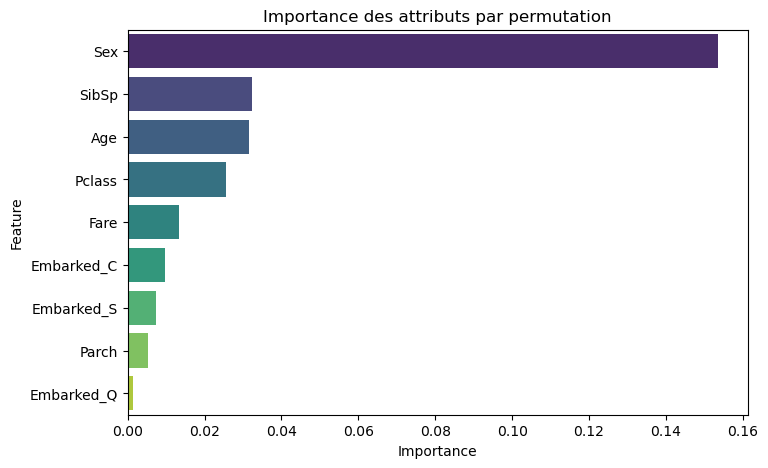

In [48]:
#### Afficher les valeurs d'importance pour le modèle mlp

results = permutation_importance(mlp, X_test, y_test, scoring='accuracy')

# Récupération de la moyenne des importances de permutation pour chaque variable
# permutation_importance de scikit-learn va, pour chaque variable, faire plusieurs permutations (par défaut, n_repeats=5) 
importances_mlp = results.importances_mean

for feature, importance in zip(X.columns, importances_mlp):
    print(f"{feature}: {importance:.4f}")

# On regroupe les noms des variables (X.columns) et leur importance moyenne (importances) dans un DataFrame.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances_mlp})

# Tri des variables par ordre d'importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Création du graphique en barres horizontales
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des attributs par permutation')
plt.show()

Pclass: 0.0627
Sex: 0.2210
Age: 0.0077
SibSp: -0.0262
Parch: -0.0041
Fare: 0.0153
Embarked_C: -0.0060
Embarked_Q: 0.0000
Embarked_S: 0.0070


C:\Users\ILEF\AppData\Local\Temp\ipykernel_1720\1956557008.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


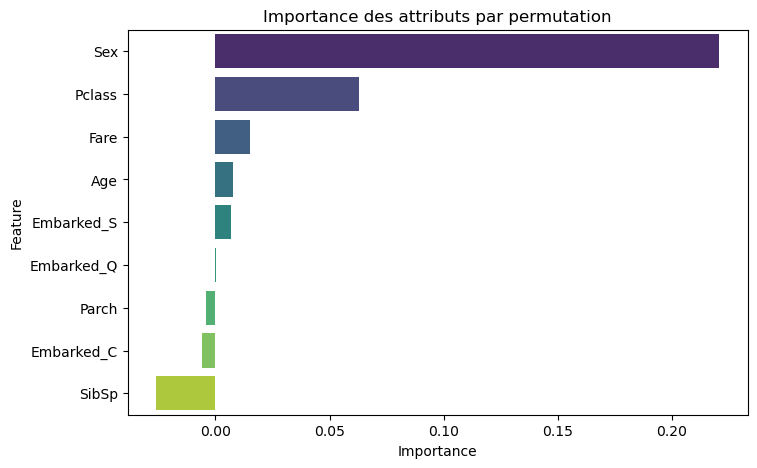

In [49]:
#### Afficher les valeurs d'importance pour le modèle knn

results = permutation_importance(rf, X_test, y_test, scoring='f1')

# Récupération de la moyenne des importances de permutation pour chaque variable
# permutation_importance de scikit-learn va, pour chaque variable, faire plusieurs permutations (par défaut, n_repeats=5) 
importances_rf = results.importances_mean

for feature, importance in zip(X.columns, importances_rf):
    print(f"{feature}: {importance:.4f}")

# On regroupe les noms des variables (X.columns) et leur importance moyenne (importances) dans un DataFrame.
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})

# Tri des variables par ordre d'importance décroissante
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Création du graphique en barres horizontales
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des attributs par permutation')
plt.show()


### b- Shap

In [51]:
# Installer la bibliothèque shap

!pip install shap

##### Shap - Explication Globale

ExactExplainer explainer: 268it [00:27,  6.64it/s]                                                                     


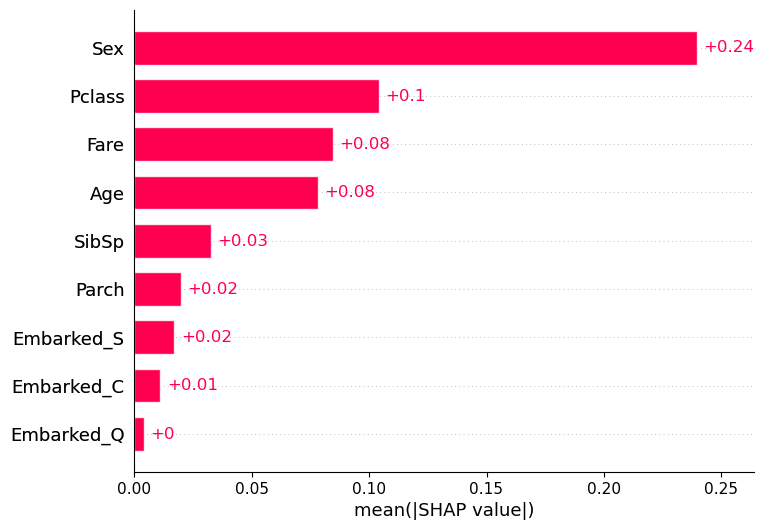

In [53]:
import shap

"""
ÉTAPE 1 : Création de l'explainer SHAP

L'explainer est l'objet qui va calculer les contributions des features.
Ici, nous utilisons la version générique shap.Explainer qui :
- Prend en entrée la fonction de prédiction du modèle (rf.predict)
- Et un jeu de données de référence (X_test) pour calculer les valeurs de base
"""
explainer = shap.Explainer(rf.predict, X_test)


"""
ÉTAPE 2 : Calcul des valeurs SHAP

Les valeurs SHAP quantifient l'impact de chaque feature pour chaque observation.
Pour chaque prédiction du modèle, elles montrent comment chaque caractéristique
a contribué à écarter la prédiction de la valeur de base (moyenne des prédictions)
"""
shap_values = explainer(X_test)


"""
ÉTAPE 3 : Visualisation des résultats

shap.plots.bar() crée un graphique résumant l'importance globale des features.
Plus précisément :
- Les features sont triées par importance décroissante
- L'importance est la moyenne des valeurs absolues des valeurs SHAP
  pour chaque feature sur toutes les observations
- Cela montre quelles features ont le plus influencé les prédictions globalement
"""
shap.plots.bar(shap_values)



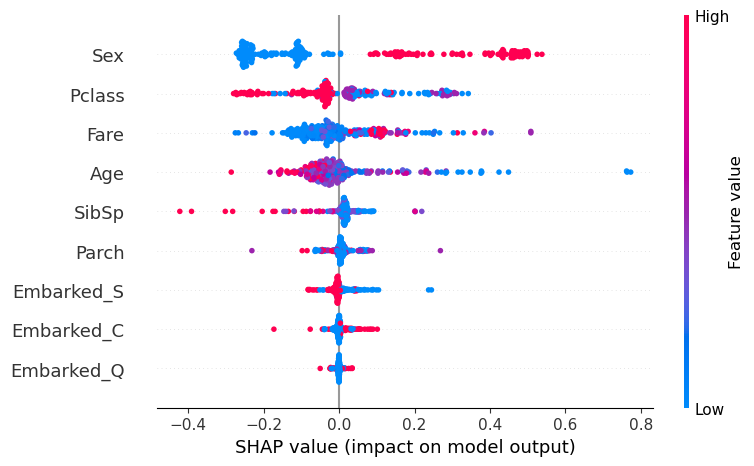

In [54]:
"""
ÉTAPE 4 : Beeswarm Plot SHAP - Visualisation avancée des effets des features

Comprendre comment chaque feature influence les prédictions.
Repérer des sous-groupes d'observations avec des comportements différents.
"""

shap.plots.beeswarm(shap_values)

##### Shap - Explication Locale

observation :         Pclass       Sex      Age     SibSp     Parch      Fare  Embarked_C  \
280  0.825209 -0.735342 -0.10134 -0.475199 -0.474326 -0.488075   -0.482711   

     Embarked_Q  Embarked_S  
280   -0.307941    0.616794  

Explication pas à pas pour la prédiction 0:


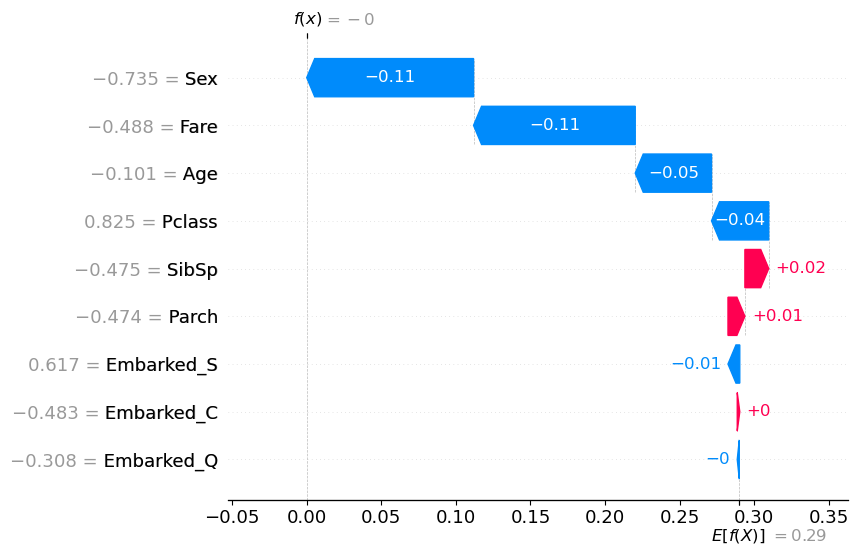

In [108]:
import shap
import matplotlib.pyplot as plt

# Analyse Locale pour une prédiction spécifique
# Choix d'une observation (ici la première du test set)
observation_idx = 0  
single_observation = X_test.iloc[observation_idx:observation_idx+1]
print("observation : ", single_observation)

# Calcul des valeurs SHAP pour cette observation seule
single_shap = explainer(single_observation)

# b) Waterfall plot (alternative explicative)
print(f"\nExplication pas à pas pour la prédiction {observation_idx}:")
shap.plots.waterfall(single_shap[0])
plt.show()


#### A faire :
##### 1) Afficher l'explication globale par shap des autres modèles : knn, dt, mlp
##### 2) Afficher l'explication locale par shap pour une instance différentede la base de Test (et avec des modèles différents)